# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# plt.subplot?

<IPython.core.display.Javascript object>


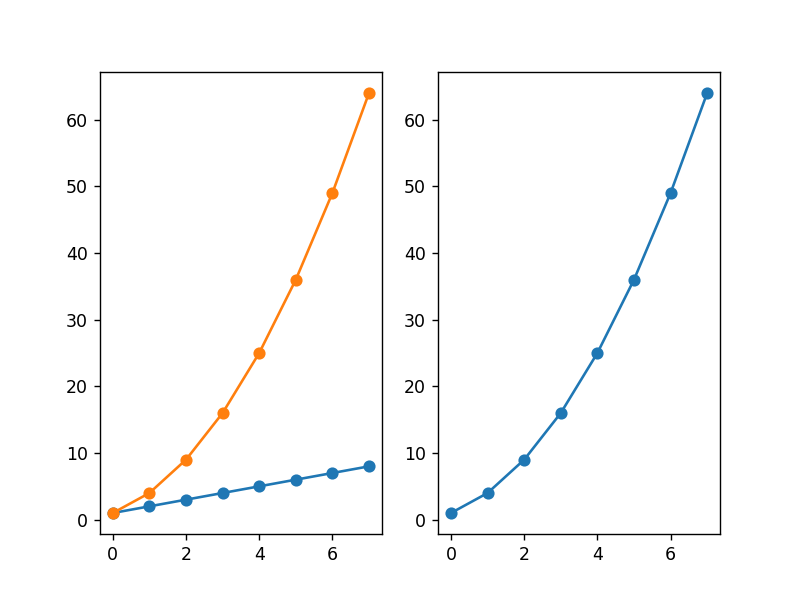

In [2]:
plt.figure()
plt.subplot(1, 2, 1)

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
 
plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2

plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-o')

C:\Users\jerrison.li\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


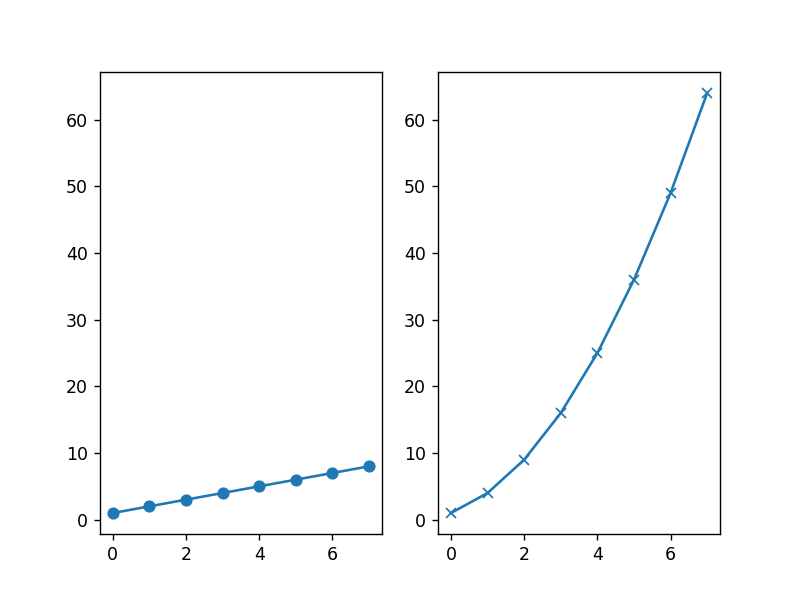

In [5]:
# sharing y axis.  We don't have to store the plot into ax1, ax2 since plt.plot
# invokes gca or get current axis
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


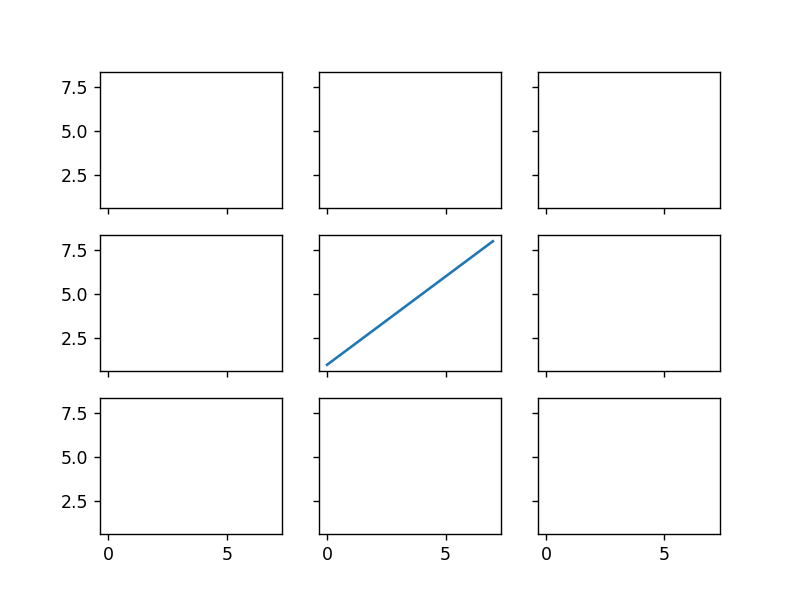

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3
                                                                       ,sharex=True
                                                                       ,sharey=True)
ax5.plot(linear_data, '-')

In [7]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [8]:
plt.gcf().canvas.draw() # why are the axes not re drawn?

# Histograms

<IPython.core.display.Javascript object>


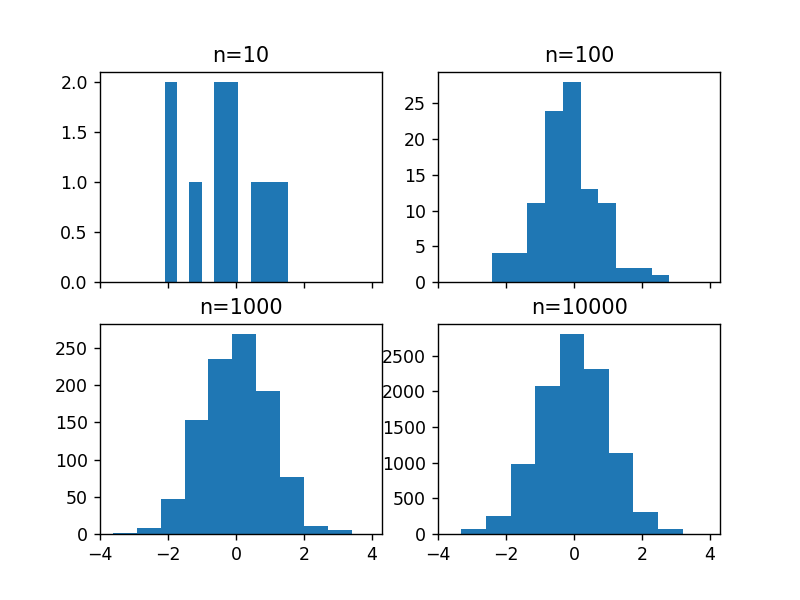

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


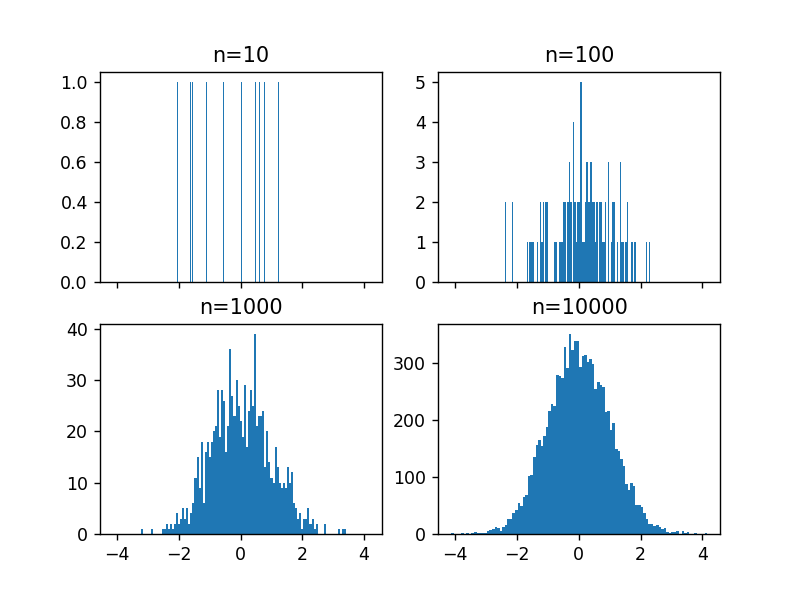

In [10]:
# example with 100 bins
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


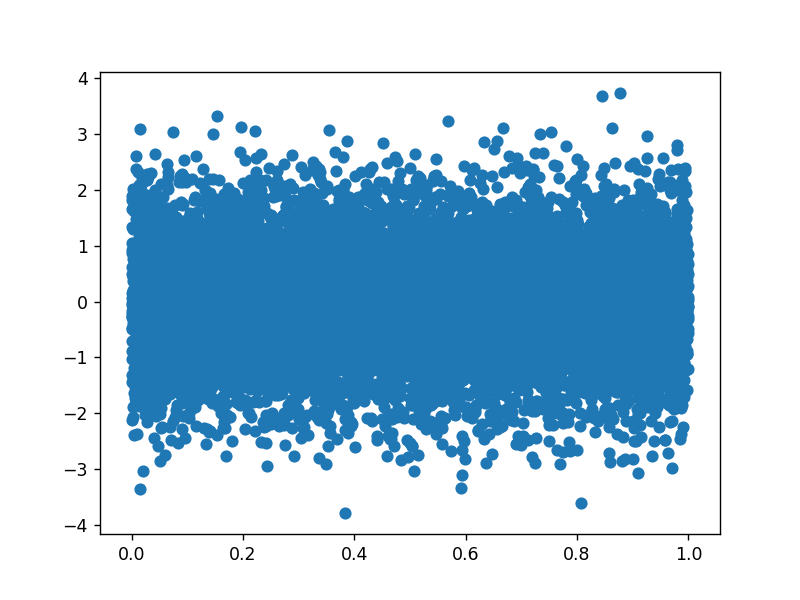

In [11]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


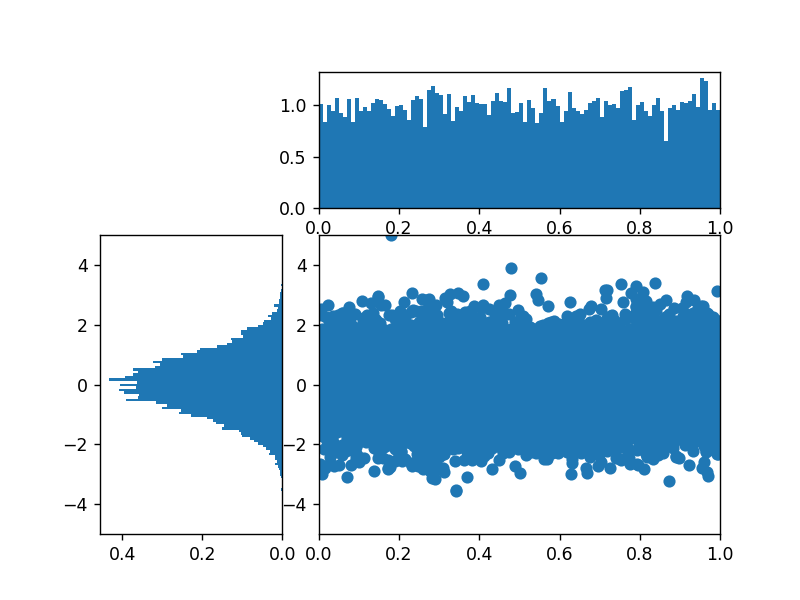

In [12]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:]) # first row, column 2 and right
side_histogram = plt.subplot(gspec[1:, 0]) # second row and below, first column
lower_right = plt.subplot(gspec[1:, 1:]) # lower 4 quadrants of 3x3 grid

In [13]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [14]:
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)

side_histogram.invert_xaxis()

In [15]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Boxplot and Whisker Plots

In [16]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [17]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.997817,0.000378,0.498710
std,1.420443,0.987171,0.287467
min,0.004462,-3.338835,0.000079
25%,0.958418,-0.672489,0.250676
50%,1.675234,-0.010684,0.501534
75%,2.688933,0.675167,0.745151
max,14.487685,3.645749,0.999900


<IPython.core.display.Javascript object>


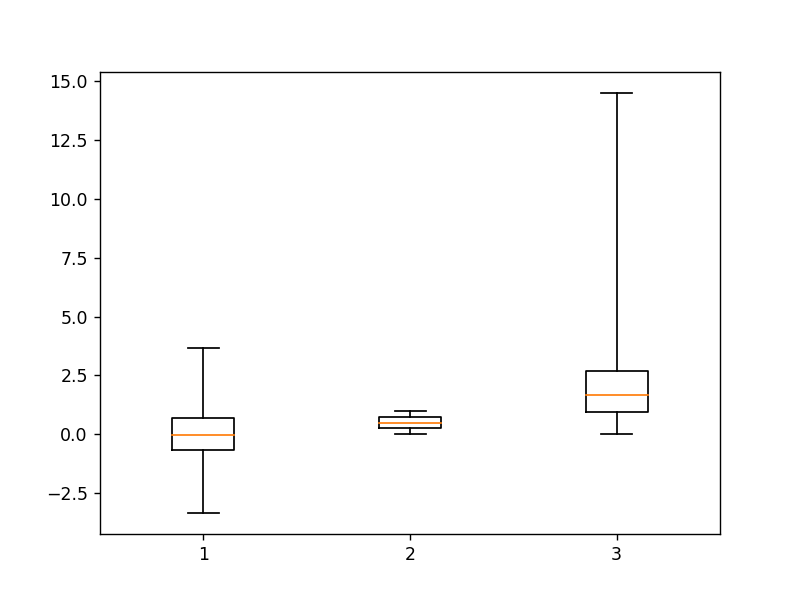

In [18]:
plt.figure()
_ = plt.boxplot(df['normal'], whis='range')

In [19]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
# gamma has a very large range

<IPython.core.display.Javascript object>


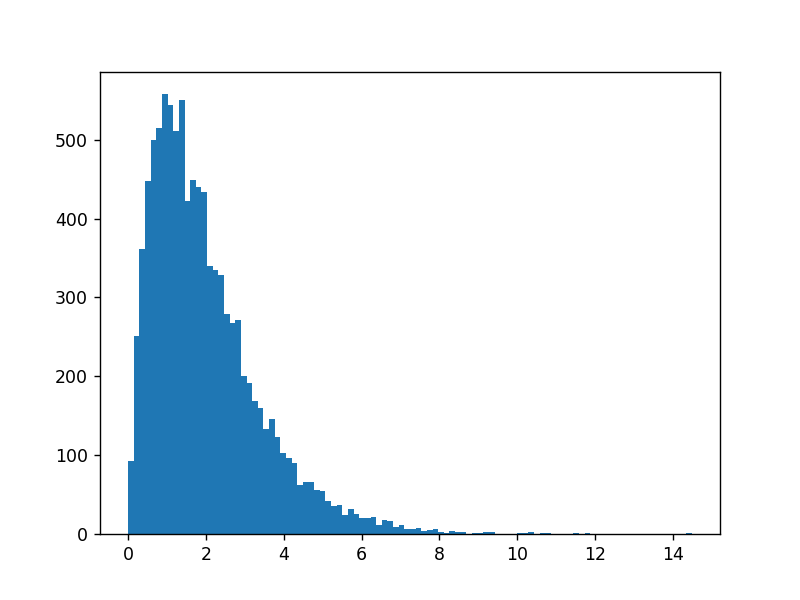

In [20]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


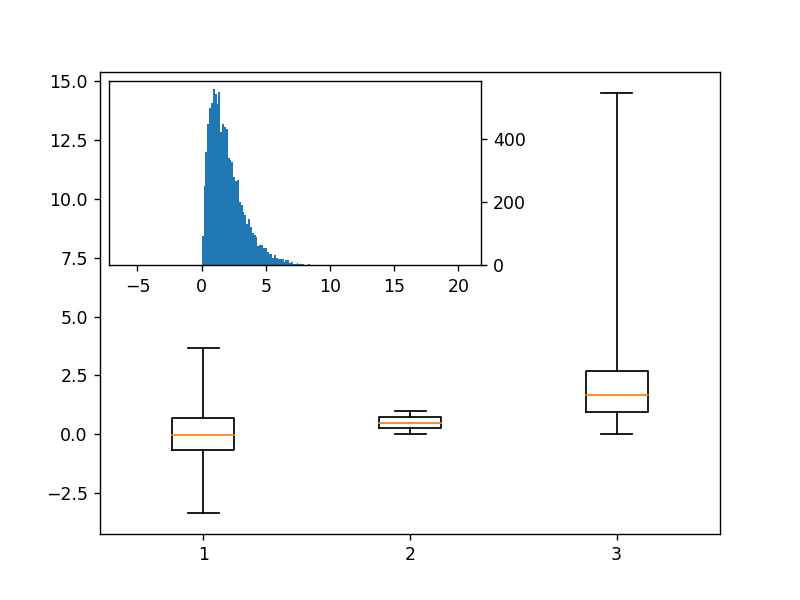

In [21]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [22]:
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


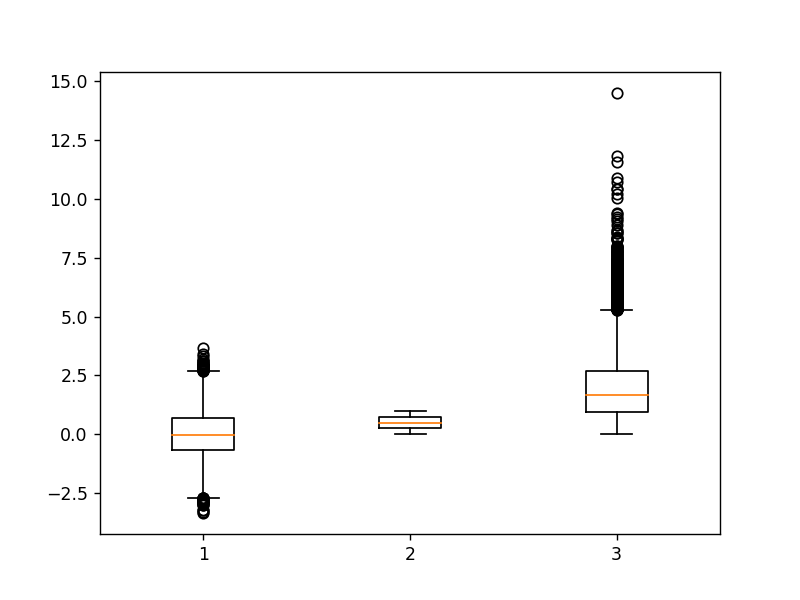

In [23]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

# Heatmaps

<IPython.core.display.Javascript object>


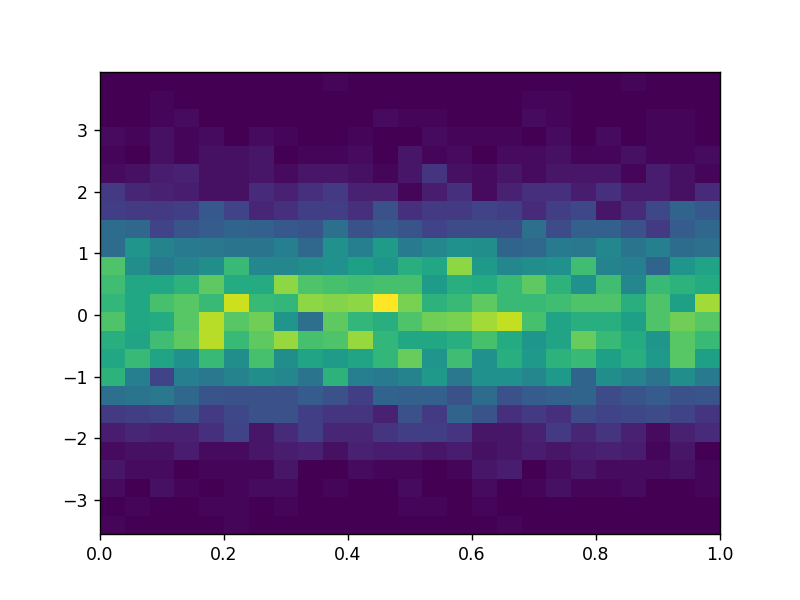

In [24]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


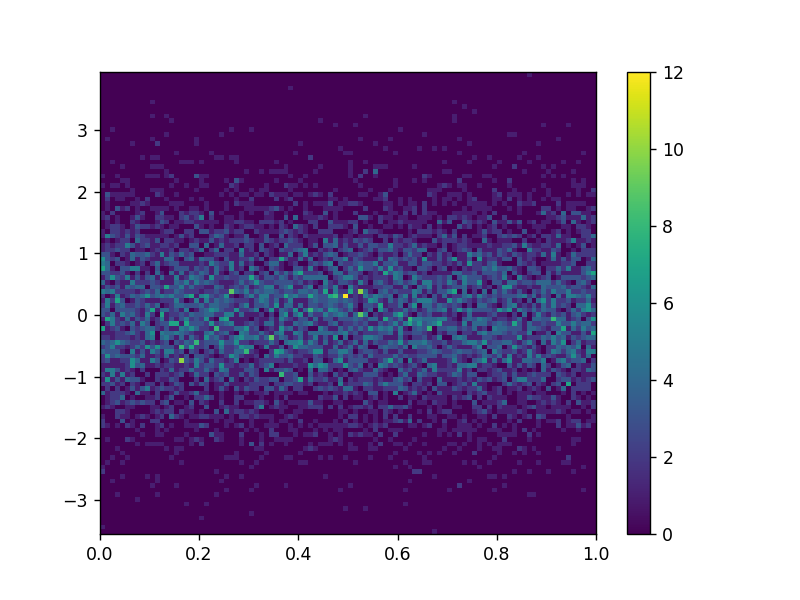

In [25]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
# ass you add more bins, all points converge to one color since every point is
# a unique value?

In [26]:
plt.colorbar()

# Animations

In [27]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [28]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


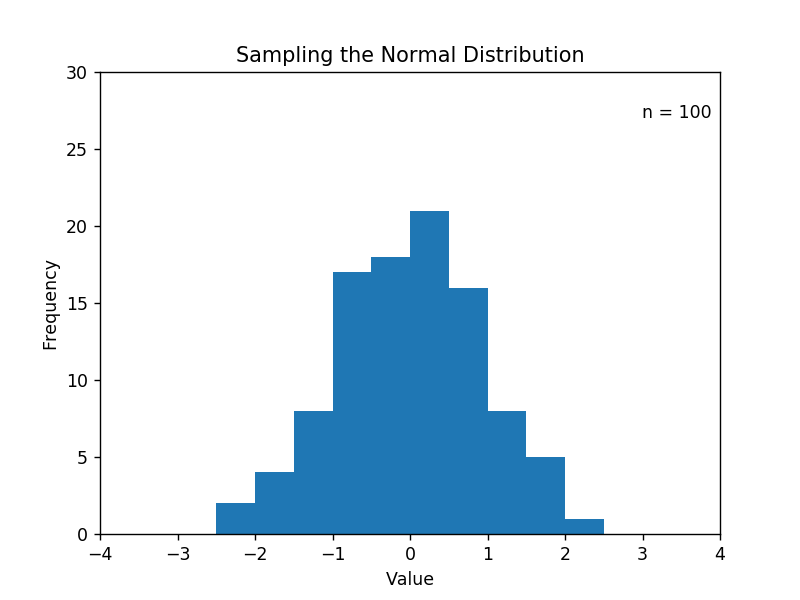

In [41]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


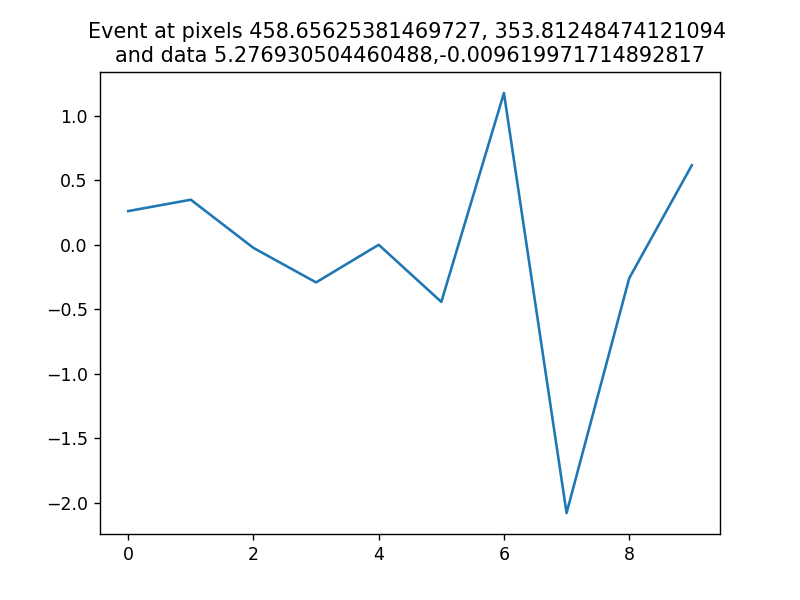

8

In [29]:
plt.figure()
data = np.random.randn(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} {}and data {},{}'.format(event.x
                                                                        , event.y
                                                                        , '\n'
                                                                        , event.xdata
                                                                        , event.ydata))
# wiring it up
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [32]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq'
           , 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origin': origins})

df

,height,origin,weight
0,0.367868,India,0.114253
1,0.725222,Brazil,0.696489
2,0.452672,Iraq,0.815331
3,0.329296,Canada,0.408403
4,0.149953,China,0.011020
5,0.618778,Chile,0.904339
6,0.871030,UK,0.920443
7,0.778132,USA,0.244541
8,0.372285,Mexico,0.014500
9,0.571692,Germany,0.111060


<IPython.core.display.Javascript object>


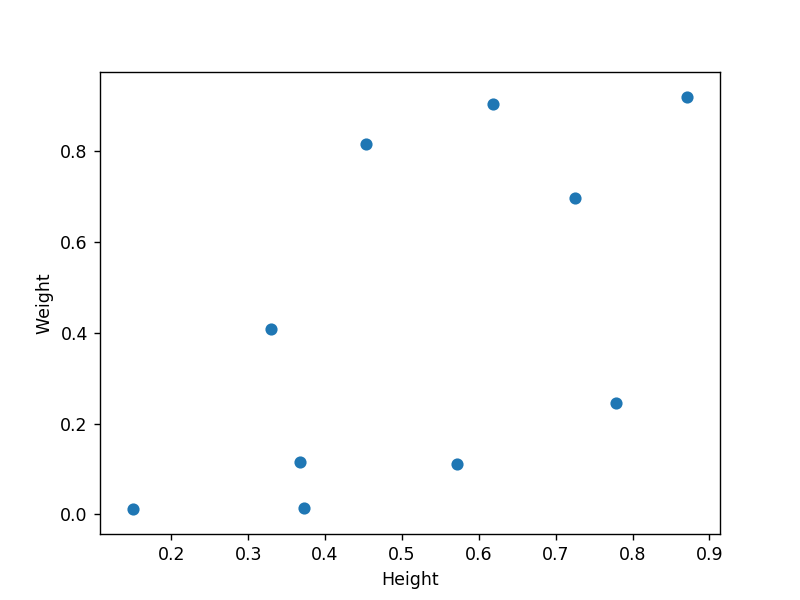

Text(0.5,0,'Height')

In [33]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [36]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
plt.gcf().canvas.mpl_connect('pick event', onpick)
# wiring does not seem to work?

10